In [1]:
import pandas as pd
gabor = pd.read_csv('Gábor 8 perc rendes.csv')
gabor_cs = pd.read_csv('Gábor 8 perc csámpás.csv')

gabor_cs.head(10)

,t,sensor,ax,ay,az,gx,gy,gz
0,1.585564e+09,17,0.031258,-1.702320,1.017827,39.888584,47.008547,63.507326
1,1.585564e+09,27,0.127961,-1.848596,-0.863492,55.555556,54.838217,9.775641
2,1.585564e+09,22,0.125519,-1.000244,0.313065,49.633700,33.394383,-13.186813
3,1.585564e+09,6,0.005861,-0.874481,0.001954,47.008547,0.007631,17.582418
4,1.585564e+09,13,0.008303,-0.987546,-0.354335,34.745116,-39.064408,2.052808
5,1.585564e+09,19,0.007814,-0.859585,0.024420,0.000000,-77.655678,33.333333
6,1.585564e+09,26,0.044200,-0.826129,0.090110,8.882784,-5.921856,-5.914225
7,1.585564e+09,17,0.765812,-2.000488,0.031502,78.151709,15.796703,16.422466
8,1.585564e+09,27,0.000000,-1.356044,0.039072,-7.814408,-23.435592,6.059219
9,1.585564e+09,22,-0.332112,-1.742369,0.003907,0.282357,-28.785104,15.644078


In [2]:
sensors=[17,27,22,6,13,19,26]

for i in sensors:
    #df_+str(i) = df.loc[df['sensor'] == i]
    setattr(pd.DataFrame ,"df_"+str(i), df.loc[df['sensor'] == i])
    print("df_"+str(i))
    #exec("%s = " % ("df_"+str(i),df.loc[df['sensor'] == i]))
df_27 = df.loc[df['sensor'] == 27]
df_22 = df.loc[df['sensor'] == 22]
df_6 = df.loc[df['sensor'] == 6]
df_13 = df.loc[df['sensor'] == 13]
df_19 = df.loc[df['sensor'] == 19]
df_26 = df.loc[df['sensor'] == 26]

NameError: name 'df' is not defined

In [3]:
gabor_cs.pivot(index='t', columns='sensor', values='ax' )#(index='date', columns='variable', values='value')

sensor,6,13,17,19,22,26,27
t,,,,,,,
1.585564e+09,NaN,NaN,0.031258,NaN,NaN,NaN,NaN
1.585564e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.127961
1.585564e+09,NaN,NaN,NaN,NaN,0.125519,NaN,NaN
1.585564e+09,0.005861,NaN,NaN,NaN,NaN,NaN,NaN
1.585564e+09,NaN,0.008303,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1.585565e+09,NaN,NaN,NaN,0.031502,NaN,NaN,NaN
1.585565e+09,NaN,NaN,NaN,NaN,NaN,0.0779,NaN
1.585565e+09,NaN,NaN,0.021245,NaN,NaN,NaN,NaN


<Figure size 720x720 with 0 Axes>

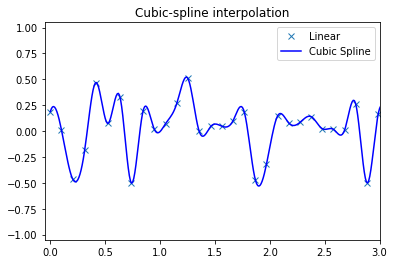

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
plt.figure(figsize=(10,10))
df_17 = gabor.loc[gabor['sensor'] == 17]
x = np.array(df_17['t'])
y = np.array(df_17['ax'])
#x_new = np.array(df_27[11:110]['t'])
x -= x[0]
#x_new -= x_new[0]
#s = interpolate.InterpolatedUnivariateSpline(x, y)
tck = interpolate.splrep(x, y, s=0)
xnew =  np.arange(0,x[-1],0.01)
ynew = interpolate.splev(xnew, tck, der=0)
plt.figure()

plt.plot(x, y, 'x', xnew, ynew, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 3, -1.05, 1.05]) #x[-1]
plt.title('Cubic-spline interpolation')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_size_inches'

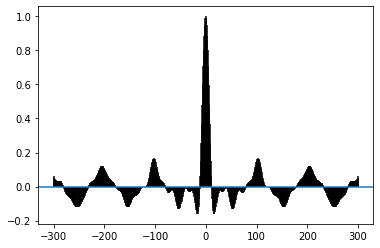

In [5]:
plt.acorr(ynew, maxlags=300)
plt.set_size_inches(18.5, 10.5)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.show()

In [ ]:
from scipy import signal
f, t, Zxx = signal.stft(ynew, 100, nperseg=300)
plt.pcolormesh(t, f[:30], np.abs(Zxx[:30,:]), vmin=0, vmax=0.1)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

widths = np.arange(1, 101)
cwtmatr = signal.cwt(ynew, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=1, vmin=-abs(cwtmatr).max())
plt.show()

In [6]:
h,w = np.shape(cwtmatr)
print(h,w)
data1 = []
for i in range(200,w,200):
    data1.append(cwtmatr[:,(i-200):i])

NameError: name 'cwtmatr' is not defined

In [7]:
plt.imshow(data1[1])

NameError: name 'data1' is not defined

In [8]:
len(data1)

NameError: name 'data1' is not defined

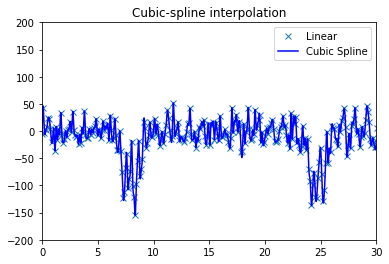

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
df_26_cs = gabor_cs.loc[gabor_cs['sensor'] == 26]
df_26 = gabor.loc[gabor['sensor'] == 26]
x = np.array(df_26['t'])
y = np.array(df_26['gy'])
x_cs = np.array(df_26_cs['t'])
y_cs = np.array(df_26_cs['gy'])
x -= x[0]
x_cs -= x_cs[0]
tck_cs = interpolate.splrep(x_cs, y_cs, s=0)
tck = interpolate.splrep(x, y, s=0)
interpx_cs =  np.arange(0,x_cs[-1],0.01)
interpx =  np.arange(0,x[-1],0.01)
interpy_cs = interpolate.splev(interpx_cs, tck_cs, der=0)
interpy = interpolate.splev(interpx, tck, der=0)
plt.figure()
plt.plot(x_cs, y_cs, 'x', interpx_cs, interpy_cs, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 30, -200.05, 200.05]) #x[-1]
plt.title('Cubic-spline interpolation')
plt.show()

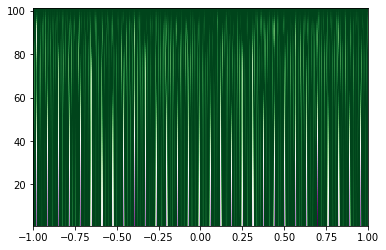

In [10]:
from scipy import signal
import matplotlib.pyplot as plt

widths = np.arange(1, 101)
cwtmatr_cs = signal.cwt(interpy_cs, signal.ricker, widths)
cwtmatr = signal.cwt(interpy, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 101], cmap='PRGn', aspect='auto',
           vmax=1, vmin=-abs(cwtmatr).max())
plt.show()

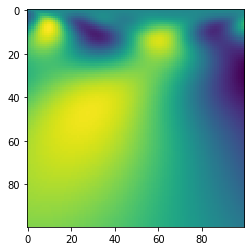

In [11]:
plt.imshow(cwtmatr_cs[:,0:100])

In [12]:
h,w = np.shape(cwtmatr)
print(h,w)
data = []
label = []
target = []
cwtmatr /= np.max(cwtmatr)
for i in range(200,w,50):
    data.append(cwtmatr[:,(i-200):i])
    label.append(np.array([1,0]))
    target.append(1)
h,w = np.shape(cwtmatr_cs)
print(h,w)
data_cs = []
label_cs = []
cwtmatr_cs /= np.max(cwtmatr_cs)
for i in range(200,w,50):
    data.append(cwtmatr_cs[:,(i-200):i])
    label.append(np.array([0,1]))
    target.append(2)


100 47685
100 48238


In [13]:
data = data_cs + data
label = label + label_cs

In [14]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import random

#numberList = [111,222,333,444,555]
#print("random item from list is: ", random.choice(numberList, k=4))



batch_size = 128
num_classes = 2
epochs = 200
split = 1500
# input image dimensions
img_rows, img_cols = 200, 100

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

#if K.image_data_format() == 'channels_first':
#    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#input_shape = (1, img_rows, img_cols)
#else:
#    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)



c = list(zip(data, label))

random.shuffle(c)

data, label = zip(*c)

y_train = np.array(label[:split])
y_test = np.array(label[split:])
x_train = np.array(data[:split])
x_test = np.array(data[split:])
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= np.max(x_train)
#x_test /= np.max(x_test)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Gabor\anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Gabor\anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A megadott modul nem található.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

TypeError: can only concatenate str (not "list") to str

In [15]:
model.predict(np.expand_dims(x_train[420,:,:,:], 0))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-a0864fb62848>", line 1, in <module>
    model.predict(np.expand_dims(x_train[420,:,:,:], 0))
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Gabor\anacon

NameError: name 'model' is not defined

In [16]:
y_train[420]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-8aaa5098a51a>", line 1, in <module>
    y_train[420]
NameError: name 'y_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\

NameError: name 'y_train' is not defined

In [17]:
print(hist.history.keys())
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-5b1e8945f44a>", line 1, in <module>
    print(hist.history.keys())
NameError: name 'hist' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tenso

NameError: name 'hist' is not defined

In [18]:
!pip install plotly

In [19]:
"""
UMAP on the Fashion MNIST Digits dataset using Datashader
---------------------------------------------------------
This is a simple example of using UMAP on the Fashion-MNIST
dataset. The goal of this example is largely to demonstrate
the use of datashader as an effective tool for visualising
UMAP results. In particular datashader allows visualisation
of very large datasets where overplotting can be a serious
problem. It supports coloring by categorical variables
(as shown in this example), or by continuous variables,
or by density (as is common in datashader examples).
"""
import umap
import numpy as np
import pandas as pd
import requests
import os
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

if not os.path.isfile("fashion-mnist.csv"):
    csv_data = requests.get("https://www.openml.org/data/get_csv/18238735/phpnBqZGZ")
    with open("fashion-mnist.csv", "w") as f:
        f.write(csv_data.text)
source_df = pd.read_csv("fashion-mnist.csv")

#c = list(zip(data, label))

#random.shuffle(c)

#data, label = zip(*c)
data2 = []
for i in data:
    data2.append(np.array(i).flatten())
data = np.array(label)
target = target


data = data2#source_df.iloc[:, :784].values.astype(np.float32)
#target = source_df["class"].values

pal = [
    "#9e0142",
    "#d8434e",
    "#f67a49",
    "#fdbf6f",
    "#feeda1",
    "#f1f9a9",
    "#bfe5a0",
    "#74c7a5",
    "#378ebb",
    "#5e4fa2",
]
color_key = {str(d): c for d, c in enumerate(pal)}

reducer = umap.UMAP(random_state=1)
embedding = reducer.fit_transform(data)

df = pd.DataFrame(embedding, columns=("x", "y"))
df["class"] = pd.Series([str(x) for x in target], dtype="category")

cvs = ds.Canvas(plot_width=1200, plot_height=1200)
agg = cvs.points(df, "x", "y", ds.count_cat("class"))
img = tf.shade(agg, color_key=color_key, how="eq_hist")

utils.export_image(img, filename="fashion-mnist", background="black")

image = plt.imread("fashion-mnist.png")
fig, ax = plt.subplots(figsize=(16, 16))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title(
    "Fashion MNIST data embedded\n"
    "into two dimensions by UMAP\n"
    "visualised with Datashader",
    fontsize=12,
)

plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-cf600f5d8926>", line 13, in <module>
    import umap
ModuleNotFoundError: No module named 'umap'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Gabor\anaconda3\lib\site-packages\ten

ModuleNotFoundError: No module named 'umap'

In [ ]:
plt.plot(embedding[:960,0], embedding[:960,1], '.')#,embedding[960:,0], embedding[960:,1], '.')

In [ ]:
(np.array(target).mean()-1)*len(target)

In [20]:
len(target)

1911

In [21]:
egy = []
ketto = []
for i in range(100):
    egy.append(i)
    ketto.append(i)
    
random.seed(100)
random.shuffle(egy)
random.shuffle(ketto)
print(egy,ketto)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-05389b2ce8b9>", line 7, in <module>
    random.seed(100)
NameError: name 'random' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_co

NameError: name 'random' is not defined

In [22]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Gabor\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Gabor\anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Gabor\anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A megadott modul nem található.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

TypeError: can only concatenate str (not "list") to str

In [ ]:
pip install keras


In [ ]:
pip install TensorFlow


In [ ]:
pip install plotly


In [ ]:
pip install tensorflow

In [19]:
pip install kernel

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement kernel (from versions: none)
ERROR: No matching distribution found for kernel


In [ ]:
pip install tensor
